In [1]:
import pandas as pd
from random import seed

seed(42)

price_df = pd.read_csv(f"../data/twlo_prices.csv")

price_df.head()

,close,volume,date
0,99.98,93417.0,2020-01-02 14:30:00+00:00
1,99.78,16685.0,2020-01-02 14:31:00+00:00
2,100.14,21998.0,2020-01-02 14:32:00+00:00
3,100.35,18348.0,2020-01-02 14:33:00+00:00
4,100.55,22181.0,2020-01-02 14:34:00+00:00


In [2]:
price_df.index = pd.to_datetime(price_df['date'])  #  A
price_df.index = price_df.index.tz_convert('US/Pacific')  # A

price_df.sort_index(inplace=True)  # B

del price_df['date']  # C

# A Set our index to be the date column
# B Sort our dataframe by the index (time)
# C Delete the date column because it is now our index

In [3]:
price_df.head()

,close,volume
date,,
2020-01-02 06:30:00-08:00,99.98,93417.0
2020-01-02 06:31:00-08:00,99.78,16685.0
2020-01-02 06:32:00-08:00,100.14,21998.0
2020-01-02 06:33:00-08:00,100.35,18348.0
2020-01-02 06:34:00-08:00,100.55,22181.0


In [4]:
import matplotlib.pyplot as plt


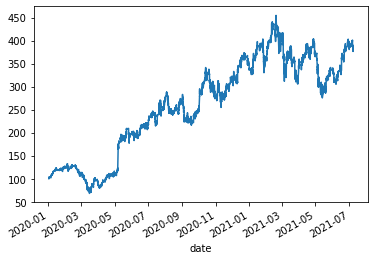

In [5]:
price_df['close'].plot()

name = 'twlo_close'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)

In [6]:
last_price_of_the_day = price_df.groupby(price_df.index.date).tail(1)['close'].rename('day_close_price')  # A
last_price_of_the_day.index = last_price_of_the_day.index.date  # A

price_df['day'] = price_df.index.date  # B

price_df = price_df.merge(last_price_of_the_day, left_on='day', right_index=True)  # C

price_df['pct_change_eod'] = (price_df['day_close_price'] - price_df['close']) / price_df['close']   # D

price_df['stock_price_rose'] = price_df['pct_change_eod'] > 0  # E

price_df.head()


# A calculate the ending price of TWLO for each day
# B Add a column to our price dataframe to represent the date
# C Merge the ending prices into our granular dataframe
# D the percent change from now until the end of the day
# E Create our response column: a binary response

,close,volume,day,day_close_price,pct_change_eod,stock_price_rose
date,,,,,,
2020-01-02 06:30:00-08:00,99.98,93417.0,2020-01-02,103.15,0.031706,True
2020-01-02 06:31:00-08:00,99.78,16685.0,2020-01-02,103.15,0.033774,True
2020-01-02 06:32:00-08:00,100.14,21998.0,2020-01-02,103.15,0.030058,True
2020-01-02 06:33:00-08:00,100.35,18348.0,2020-01-02,103.15,0.027902,True
2020-01-02 06:34:00-08:00,100.55,22181.0,2020-01-02,103.15,0.025858,True


## Date/time related features


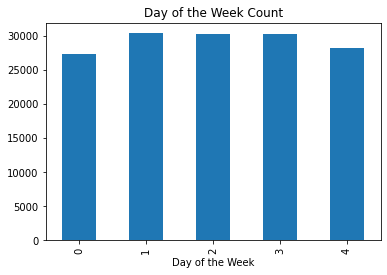

In [7]:
# Datetime features

price_df['feature__dayofweek'] = price_df.index.dayofweek  # A
price_df['feature__morning'] = price_df.index.hour < 12  # B

# A An ordinal feature representing the day of the week
# B A binary feature for whether it is before noon or not

price_df['feature__dayofweek'].value_counts().sort_index().plot(kind='bar', title='Day of the Week Count')
plt.xlabel('Day of the Week')

name = 'dayofweek'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


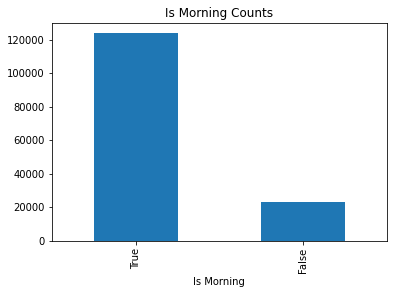

In [8]:
price_df['feature__morning'].value_counts().plot(kind='bar', title='Is Morning Counts')
plt.xlabel('Is Morning')


name = 'ismorning'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


## Lag / Rolling Window features

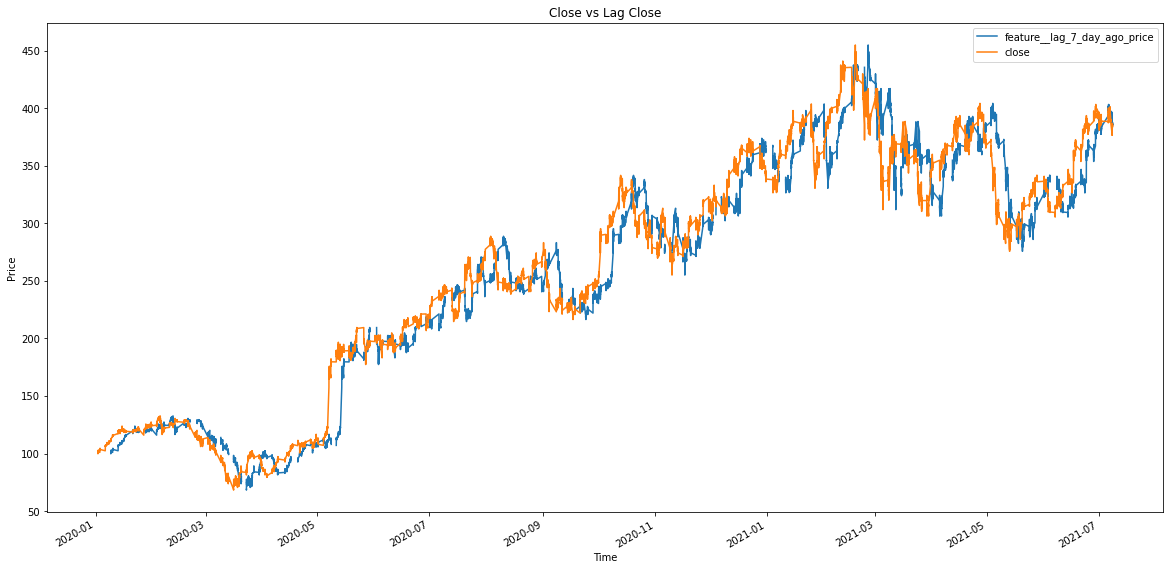

In [9]:
price_df['feature__lag_30_min_ago_price'] = price_df['close'].shift(30, freq='T')
price_df['feature__lag_7_day_ago_price'] = price_df['close'].shift(7, freq='D')

price_df['feature__lag_7_day_ago_price'].plot(figsize=(20,10), title='Close vs Lag Close')
price_df['close'].plot()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')

name = 'lag'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


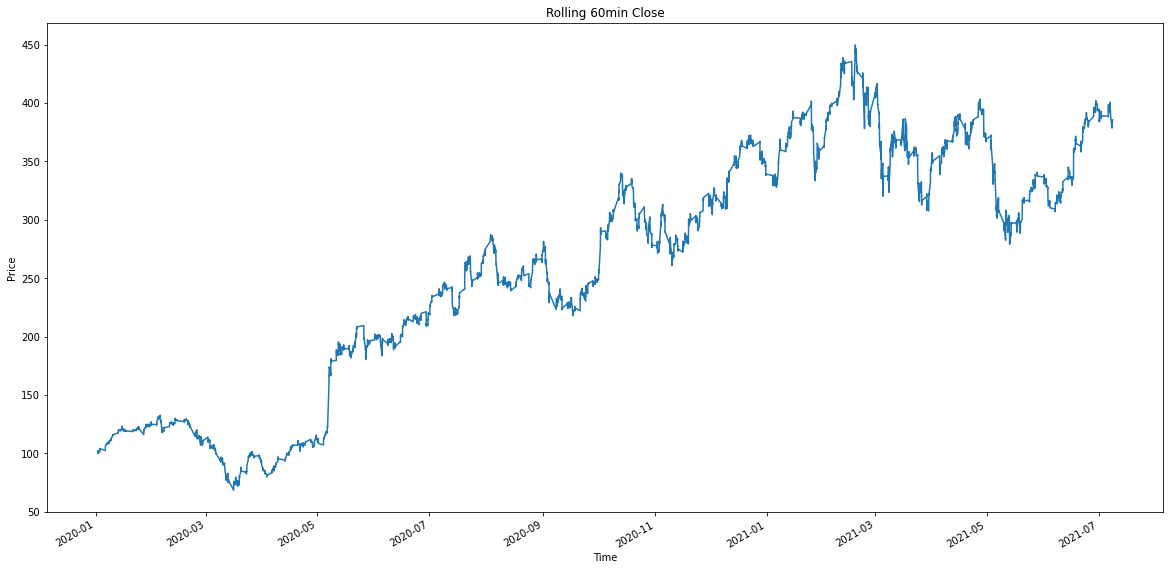

In [10]:
price_df['feature__rolling_close_mean_60'] = price_df['close'].rolling('60min').mean()

price_df['feature__rolling_close_mean_60'].plot(figsize=(20, 10), title='Rolling 60min Close')

plt.xlabel('Time')
plt.ylabel('Price')

name = 'rolling'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [11]:
price_df['feature__rolling_close_std_60'] = price_df['close'].rolling('60min').std()
price_df['feature__rolling_volume_mean_60'] = price_df['volume'].rolling('60min').mean()
price_df['feature__rolling_volume_std_60'] = price_df['volume'].rolling('60min').std()

price_df.dropna(inplace=True)

## Expanding Window features

In [12]:
price_df['feature__expanding_close_mean'] = price_df['close'].expanding(200).mean()
price_df['feature__expanding_volume_mean'] = price_df['volume'].expanding(200).mean()

price_df.dropna(inplace=True)

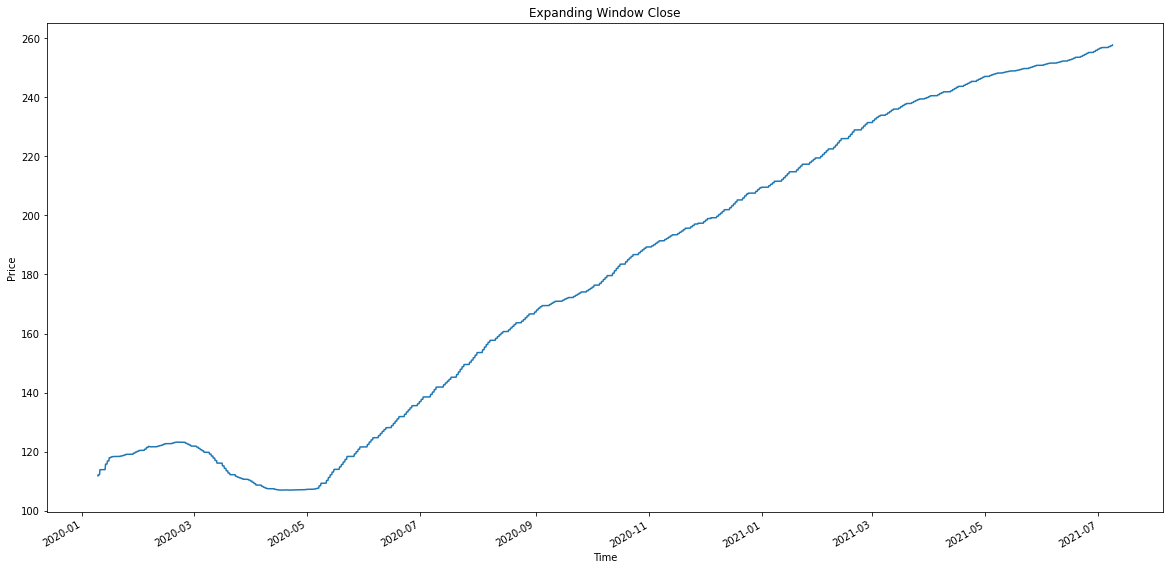

In [13]:
price_df['feature__expanding_close_mean'].plot(figsize=(20, 10), title='Expanding Window Close')

plt.xlabel('Time')
plt.ylabel('Price')

name = 'expanding_close'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


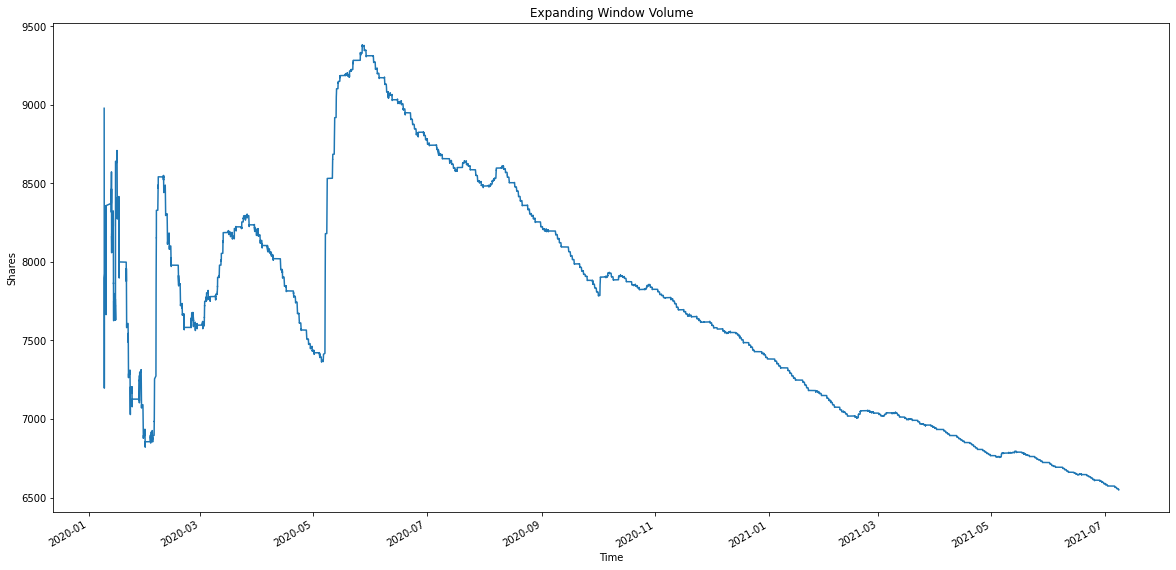

In [14]:
price_df['feature__expanding_volume_mean'].plot(figsize=(20, 10), title='Expanding Window Volume')


plt.xlabel('Time')
plt.ylabel('Shares')

name = 'expanding_volume'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [15]:
%run ./Base.ipynb

In [16]:
from sklearn.pipeline import Pipeline  # A
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

clf = RandomForestClassifier(random_state=0)

ml_pipeline = Pipeline([  # B
    ('scale', StandardScaler()),
    ('classifier', clf)
])

params = {  # C
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_split': [2, 3, 5],
    
    'classifier__max_depth': [10, None],
    'classifier__max_features': [None, 'auto']
}

# A Import the scikit-learn Pipeline object
# B Create a pipeline with feature scaling and our classifier
# C Create the base gridsearch parameters



In [17]:
from sklearn.model_selection import TimeSeriesSplit  # A

tscv = TimeSeriesSplit(n_splits=2)  # A

# A This splitter will give us train/test splits optimized for time data

In [18]:
for train_index, test_index in TimeSeriesSplit(n_splits=5).split(price_df):
    train_times, test_times = price_df.iloc[train_index].index, price_df.iloc[test_index].index
    print(f'Training between {train_times.min()} and {train_times.max()}')
    print(f'Testing  between {test_times.min()} and {test_times.max()}\n')
    
    

Training between 2020-01-09 10:20:00-08:00 and 2020-04-06 12:09:00-07:00
Testing  between 2020-04-06 12:10:00-07:00 and 2020-07-01 09:26:00-07:00

Training between 2020-01-09 10:20:00-08:00 and 2020-07-01 09:26:00-07:00
Testing  between 2020-07-01 09:27:00-07:00 and 2020-09-25 09:32:00-07:00

Training between 2020-01-09 10:20:00-08:00 and 2020-09-25 09:32:00-07:00
Testing  between 2020-09-25 09:33:00-07:00 and 2020-12-22 09:33:00-08:00

Training between 2020-01-09 10:20:00-08:00 and 2020-12-22 09:33:00-08:00
Testing  between 2020-12-22 09:34:00-08:00 and 2021-03-30 07:59:00-07:00

Training between 2020-01-09 10:20:00-08:00 and 2021-03-30 07:59:00-07:00
Testing  between 2021-03-30 08:00:00-07:00 and 2021-07-08 12:59:00-07:00



In [19]:
price_df.filter(regex='feature__').corrwith(price_df['stock_price_rose']).sort_values()

feature__rolling_volume_mean_60   -0.003444
feature__rolling_volume_std_60    -0.002263
feature__expanding_volume_mean    -0.002219
feature__dayofweek                -0.001477
feature__morning                   0.025632
feature__expanding_close_mean      0.033297
feature__rolling_close_mean_60     0.040732
feature__lag_30_min_ago_price      0.040766
feature__lag_7_day_ago_price       0.041196
feature__rolling_close_std_60      0.055433
dtype: float64

In [20]:
def split_data(price_df):
    ''' This function takes in our price dataframe and splits it into a training and validation set
    as well as filtering our rows to only use rows that are on the hour
    '''
    downsized_price_df = price_df[(price_df.index.minute == 0)]  # A
    train_df, test_df = downsized_price_df[:'2021-05-31'], downsized_price_df['2021-06-01':]  # B
    train_X, test_X = train_df.filter(regex='feature'), test_df.filter(regex='feature')  # C
    train_y, test_y = train_df['stock_price_rose'], test_df['stock_price_rose'] # D
    return train_df, test_df, train_X, train_y, test_X, test_y

# A limit our data to only make trades at the 0 minute mark. Usually 6-7 times a day
# B Split our dataframe into training and validation (before and after June 2021)
# C Use the pandas filter method to select the features based on the prefix feature__ we have been adding
# D Split our target variable based on our June 2021 split


In [21]:
train_df, test_df, train_X, train_y, test_X, test_y = split_data(price_df)

print("Date-time/Lag/Window/Rolling features + Random Forest\n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params, 
    cv=tscv, include_probas=True  # C
)


Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.50      0.82      0.62        72
        True       0.41      0.13      0.20        69

    accuracy                           0.48       141
   macro avg       0.45      0.47      0.41       141
weighted avg       0.45      0.48      0.41       141

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'auto', 'classifier__min_samples_split': 3}
Overall took 18.55 seconds


In [22]:
def plot_gains(df, response, predictions):
    ''' A simulation of acting on the First prediction of the day '''
    df['predictions'] =  predictions
    df['movement_correct_multiplier'] = (predictions == response).map({True: 1, False: -1})
    df['gain'] = df['movement_correct_multiplier'] * df['pct_change_eod'].abs()
    
    
    bullish = df[predictions == True]
    bullish_gains = bullish.sort_index().groupby(bullish.index.date).head(1)['gain']
    bullish_gains.cumsum().plot(label='Bullish Only', legend=True)
    print(f'% of time with profit: {(bullish_gains.cumsum() > 0).mean():.3f}')
    print(f'Total Gains for bullish is {bullish_gains.sum():.3f}')
    
    bearish = df[predictions == False]
    bearish_gains = bearish.sort_index().groupby(bearish.index.date).head(1)['gain']
    bearish_gains.cumsum().plot(label='Bearish Only', legend=True)
    print(f'% of time with profit: {(bearish_gains.cumsum() > 0).mean():.3f}')
    print(f'Total Gains for bearish is {bearish_gains.sum():.3f}')
    
    gains = df.sort_index().groupby(df.index.date).head(1)['gain']
    gains.cumsum().plot(label='All Predictions', legend=True)
    print(f'% of time with profit: {(gains.cumsum() > 0).mean():.3f}')
    print(f'Total Gains for all predictions is {gains.sum():.3f}')
    
    plt.title('Gains')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Gains')
    


% of time with profit: 0.077
Total Gains for bullish is -0.043
% of time with profit: 0.500
Total Gains for bearish is -0.004
% of time with profit: 0.308
Total Gains for all predictions is -0.021


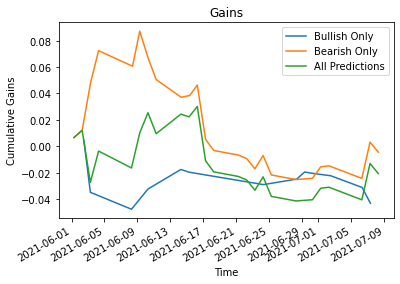

In [23]:
plot_gains(test_df.copy(), test_y, test_preds)

name = 'baseline_gains'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)

In [24]:
test_y.value_counts(normalize=True)  # A

# A Guessing bearish has a null accuracy of just over 51%

False    0.510638
True     0.489362
Name: stock_price_rose, dtype: float64

## Domain Features

In [25]:
daily_features = pd.DataFrame()  # A

daily_features['first_5_min_avg_close'] = price_df.groupby(
    price_df.index.date
)['close'].apply(lambda x: x.head().mean())  #  B
daily_features['last_5_min_avg_close'] = price_df.groupby(
    price_df.index.date
)['close'].apply(lambda x: x.tail().mean())  # B


daily_features['feature__overnight_change_close'] = \
    (daily_features['first_5_min_avg_close'] - daily_features['last_5_min_avg_close'].shift(1)) / daily_features['last_5_min_avg_close'].shift(1)  # C
daily_features['feature__monthly_pct_change_close'] = daily_features['first_5_min_avg_close'].pct_change(periods=31)  # D
daily_features['feature__expanding_average_close'] = daily_features['first_5_min_avg_close'].expanding(31).mean()  # E

# A Make a dataframe to hold stats about the day itself
# B Average the first and last 5 minutes of the day to get an opening and closing price
# C The overnight change (pct change from the  previous closing price to the current opening price)
# D A rolling percent change of opening price (window  of 31 datapoints)
# E An expanding window function of average opening price (omitting the first 31 datapoints for stability)



## MACD

In [26]:
def macd(ticker):  # A
    exp1 = ticker.ewm(span=12, adjust=False).mean()
    exp2 = ticker.ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    return macd.ewm(span=9, adjust=False).mean()

daily_features['feature__macd'] = macd(daily_features['first_5_min_avg_close'])  # B

price_df = price_df.merge(daily_features, left_on=price_df.index.date, right_index=True)  # C
price_df.dropna(inplace=True)

# A function to calculate macd
# B calculate macd using the opening prices
# C Merge the daily features into the main price Dataframe

In [42]:
price_df.describe()

,close,volume,day_close_price,pct_change_eod,feature__dayofweek,feature__lag_30_min_ago_price,feature__lag_7_day_ago_price,feature__rolling_close_mean_60,feature__rolling_close_std_60,feature__rolling_volume_mean_60,...,feature__expanding_close_mean,feature__expanding_volume_mean,first_5_min_avg_close,last_5_min_avg_close,feature__overnight_change_close,feature__monthly_pct_change_close,feature__expanding_average_close,feature__macd,feature__rolling_7_day_total_tweets,feature__rolling_1_day_verified_count
count,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,...,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000,113262.000000
mean,270.992093,6444.631606,270.922408,-0.000185,1.995179,270.976685,267.298720,270.979216,1.099435,6661.142241,...,181.558979,7741.485050,270.970102,270.972966,0.003689,0.150072,182.494635,4.934485,731.245590,1.269367
std,95.228036,10041.718219,95.259111,0.016404,1.371313,95.265620,96.272019,95.254057,0.816496,7376.052809,...,49.924718,753.499926,95.516392,95.264332,0.033377,0.333523,51.334508,9.326529,572.014059,3.358717
min,69.440000,0.000000,71.700000,-0.087467,0.000000,68.245000,69.440000,69.987349,0.085950,729.133333,...,106.952994,6547.614079,69.653000,71.838000,-0.120443,-0.430004,106.561747,-16.825520,68.000000,0.000000
25%,214.276250,2093.000000,215.250000,-0.007639,1.000000,214.162500,207.768200,214.244976,0.556499,3211.189831,...,132.880295,7037.573174,214.278720,215.362000,-0.013399,-0.073450,132.829049,-2.763562,407.000000,0.000000
50%,285.350003,3887.000000,286.290000,0.000000,2.000000,285.240000,281.295600,285.126472,0.871947,4830.758333,...,183.339998,7754.690987,287.052000,286.612000,0.003853,0.121232,183.079541,4.979540,589.000000,0.000000
75%,349.167501,7301.000000,350.090000,0.007760,3.000000,349.010007,344.980011,349.181354,1.389385,7674.200000,...,230.147001,8272.942389,346.935999,349.810000,0.019907,0.255093,231.866110,12.669828,838.000000,1.000000
max,450.668200,836241.000000,443.490000,0.097804,4.000000,454.960000,450.668200,448.370166,9.065367,191924.580645,...,257.759615,9380.736161,446.977660,443.699500,0.345628,1.315708,262.179296,22.514321,3086.000000,45.000000


In [28]:
tweet_df = pd.read_csv(f"../data/twlo_tweets.csv", encoding='ISO-8859-1')

tweet_df.index = pd.to_datetime(tweet_df['date_tweeted'])
tweet_df.index = tweet_df.index.tz_convert('US/Pacific')
del tweet_df['date_tweeted']

tweet_df.sort_index(inplace=True)
tweet_df.dropna(inplace=True)

tweet_df = tweet_df['2019-12-01':'2021-07-08']


tweet_df.head()

,text,tweet_unique_id,author_verified,num_followers
date_tweeted,,,,
2019-12-01 00:31:34-08:00,RT @BrianFeroldi: Tech stocks I follow ranked ...,1.201056e+18,False,1557.0
2019-12-01 01:03:56-08:00,Benjamin Graham and the Power of Growth Stocks...,1.201064e+18,False,1150.0
2019-12-01 01:25:16-08:00,RT @BrianFeroldi: Tech stocks I follow ranked ...,1.201070e+18,False,3887.0
2019-12-01 01:34:11-08:00,RT @BrianFeroldi: Tech stocks I follow ranked ...,1.201072e+18,False,881.0
2019-12-01 01:55:24-08:00,RT @BrianFeroldi: Tech stocks I follow ranked ...,1.201077e+18,False,6.0


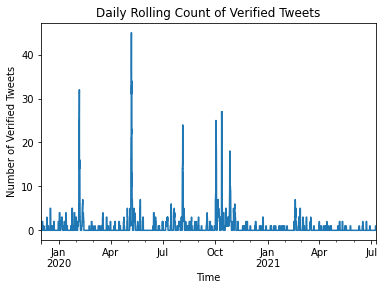

In [29]:
rolling_1_day_verified_count = tweet_df.resample('1T')['author_verified'].sum().rolling('1D').sum()

rolling_1_day_verified_count.plot(title='Daily Rolling Count of Verified Tweets')
plt.xlabel('Time')
plt.ylabel('Number of Verified Tweets')


name = '1_day_verified'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)

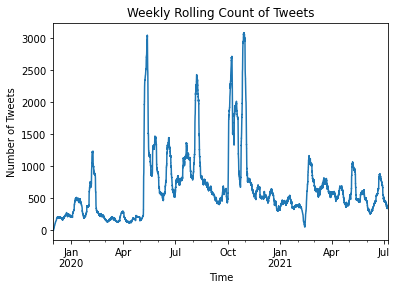

In [30]:
rolling_7_day_total_tweets = tweet_df.resample('1T')['tweet_unique_id'].count().rolling('7D').sum()

rolling_7_day_total_tweets.plot(title='Weekly Rolling Count of Tweets')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')


name = '7_day_tweet'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)

In [31]:
twitter_stats = pd.DataFrame({
    'feature__rolling_7_day_total_tweets': rolling_7_day_total_tweets,
    'feature__rolling_1_day_verified_count': rolling_1_day_verified_count
})  # A

twitter_stats.index = pd.to_datetime(twitter_stats.index)  # B
twitter_stats.index = twitter_stats.index.tz_convert('US/Pacific')  # B

price_df = price_df.merge(twitter_stats, left_index=True, right_index=True)  # C

# A Create a dataframe with the twitter stats
# B Standardize the index to make the following merge easier
# C Merge twitter stats into our price dataframe

In [32]:
price_df.filter(regex='feature__').corrwith(price_df['stock_price_rose']).sort_values()

feature__rolling_7_day_total_tweets     -0.030404
feature__dayofweek                      -0.002365
feature__expanding_volume_mean          -0.000644
feature__monthly_pct_change_close        0.001672
feature__rolling_1_day_verified_count    0.005921
feature__rolling_volume_mean_60          0.007773
feature__rolling_volume_std_60           0.010038
feature__expanding_close_mean            0.024770
feature__expanding_average_close         0.024801
feature__morning                         0.025106
feature__rolling_close_mean_60           0.030839
feature__lag_30_min_ago_price            0.030878
feature__lag_7_day_ago_price             0.031859
feature__macd                            0.037216
feature__overnight_change_close          0.045098
feature__rolling_close_std_60            0.051801
dtype: float64

Add Domain Features
              precision    recall  f1-score   support

       False       0.53      0.92      0.67        72
        True       0.62      0.14      0.24        69

    accuracy                           0.54       141
   macro avg       0.58      0.53      0.45       141
weighted avg       0.58      0.54      0.46       141

Best params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': 'auto', 'classifier__min_samples_split': 5}
Overall took 22.70 seconds
% of time with profit: 0.375
Total Gains for bullish is 0.036
% of time with profit: 1.000
Total Gains for bearish is 0.059
% of time with profit: 1.000
Total Gains for all predictions is 0.150


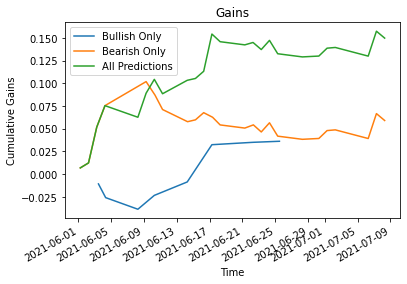

In [33]:
train_df, test_df, train_X, train_y, test_X, test_y = split_data(price_df)

print("Add Domain Features\n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params, 
    cv=tscv, include_probas=True  # C
)

plot_gains(test_df.copy(), test_y, test_preds)


name = 'domain_gains'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)

# A new features in price_df require a new split

## Feature Selection

Feature Selection (SFM) 
              precision    recall  f1-score   support

       False       0.49      0.71      0.58        72
        True       0.43      0.23      0.30        69

    accuracy                           0.48       141
   macro avg       0.46      0.47      0.44       141
weighted avg       0.46      0.48      0.44       141

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_split': 3, 'select_from_model__estimator': LogisticRegression(random_state=0), 'select_from_model__threshold': 'median'}
Overall took 159.72 seconds
% of time with profit: 0.000
Total Gains for bullish is -0.038
% of time with profit: 1.000
Total Gains for bearish is 0.017
% of time with profit: 0.923
Total Gains for all predictions is 0.004


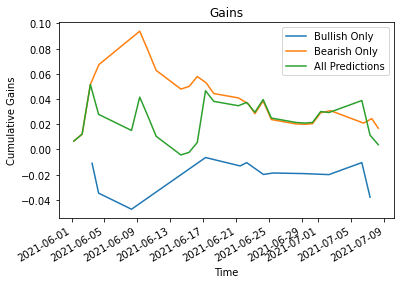

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators=20, max_depth=None, random_state=0)  # A
lr = LogisticRegression(random_state=0)

ml_pipeline = Pipeline([  
    ('scale', StandardScaler()),
    ('select_from_model', SelectFromModel(estimator=rf)),
    ('classifier', clf)
])

params.update({
    'select_from_model__threshold': [
        '0.5 * mean', 'mean', '0.5 * median', 'median'
    ],
    'select_from_model__estimator':  [rf, lr]
})

print("Feature Selection (SFM) \n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params, 
    cv=tscv, include_probas=True  # C
)

del params['select_from_model__threshold']
del params['select_from_model__estimator']

plot_gains(test_df.copy(), test_y, test_preds)


name = 'sfm_gains'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)

# The feature importances in this random forest will dictate which features to select


In [35]:
train_X.shape

(1958, 16)

In [36]:
from sklearn.feature_selection import RFE

ml_pipeline = Pipeline([  
    ('scale', StandardScaler()),
    ('rfe', RFE(estimator=rf)),  # A
    ('classifier', clf)
])

params.update({
    'rfe__n_features_to_select': [0.6, 0.7, 0.8, 0.9],
    'rfe__estimator':  [rf, lr]
})

print("Feature Selection (RFE) \n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params, 
    cv=tscv, include_probas=True  # C
)
del params['rfe__n_features_to_select']
del params['rfe__estimator']

plot_gains(test_df.copy(), test_y, test_preds)


name = 'rfe_gains'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


Feature Selection (RFE) 


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-6bcec8b79e12>", line 15, in <module>
    best_model, test_preds, test_probas = advanced_grid_search(
  File "<ipython-input-15-4fbf44d23c70>", line 11, in advanced_grid_search
    model_grid_search.fit(x_train, y_train)
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 1288, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 795, in evaluate_candidates
    out

TypeError: object of type 'NoneType' has no len()

In [ ]:
list(zip(train_df.filter(regex='feature__').columns, best_model.named_steps['rfe'].ranking_))  # A

# A get the ranking of features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

ml_pipeline = Pipeline([  
    ('poly', PolynomialFeatures(1, include_bias=False)),
    ('scale', StandardScaler()),
    ('select_from_model', SelectFromModel(estimator=rf)),  # A
    ('classifier', clf)
])

params.update({
    'select_from_model__threshold': ['0.5 * mean', 'mean', '0.5 * median', 'median'],
    'select_from_model__estimator':  [rf, lr],
    'poly__degree': [2],
})

print("Polynomial Features \n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params, 
    cv=tscv, include_probas=True  # C
)

del params['poly__degree']
del params['select_from_model__threshold']
del params['select_from_model__estimator']

plot_gains(test_df.copy(), test_y, test_preds)

name = 'poly_gains'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [ ]:
print(best_model)